In [ ]:
 !pip install --pre pycaret
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, recall_score, precision_score
import statsmodels.api as sm

In [ ]:
df = pd.read_csv(r"/content/high_diamond_ranked_10min.csv")
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [ ]:
df.shape

(9879, 40)

In [ ]:
df.isnull().sum()
df = df.dropna()

In [ ]:
df.dtypes

gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


In [ ]:
df.drop(["gameId"], 1, inplace=True)
df #gameID is useless in predictive modeling

<ipython-input-6-06a8c7419740>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(["gameId"], 1, inplace=True)


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [ ]:
import pycaret.classification as pyclassification

s = pyclassification.setup(df, target="blueWins") #the dataset pre feature selection

,Description,Value
0,Session id,5764
1,Target,blueWins
2,Target type,Binary
3,Original data shape,"(9879, 39)"
4,Transformed data shape,"(9879, 39)"
5,Transformed train set shape,"(6915, 39)"
6,Transformed test set shape,"(2964, 39)"
7,Numeric features,38
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# pyreg.add_metric("accuracy_score", "Accuracy", accuracy_score, greater_is_better=True)
# pyreg.add_metric("auc", "AUC", auc, greater_is_better=True)
# pyreg.add_metric("recall_score", "Recall", recall_score, greater_is_better=True)
# pyreg.add_metric("precision_score", "Precision", precision_score, greater_is_better=True)
best = pyclassification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7281,0.0000,0.7253,0.7288,0.7269,0.4562,0.4564,0.0920
lda,Linear Discriminant Analysis,0.7281,0.8107,0.7253,0.7288,0.7269,0.4562,0.4564,0.0800
gbc,Gradient Boosting Classifier,0.7271,0.8080,0.7163,0.7315,0.7236,0.4542,0.4545,3.1420
nb,Naive Bayes,0.7265,0.8044,0.7195,0.7292,0.7242,0.4531,0.4532,0.0780
lr,Logistic Regression,0.7263,0.8059,0.7244,0.7264,0.7253,0.4525,0.4526,1.2920
rf,Random Forest Classifier,0.7216,0.7957,0.7024,0.7297,0.7156,0.4432,0.4437,2.9470
ada,Ada Boost Classifier,0.7209,0.8006,0.7140,0.7236,0.7185,0.4418,0.4421,0.8800
et,Extra Trees Classifier,0.7197,0.7977,0.7085,0.7243,0.7161,0.4395,0.4398,1.0770
lightgbm,Light Gradient Boosting Machine,0.7167,0.7969,0.7068,0.7207,0.7135,0.4334,0.4337,1.0560
xgboost,Extreme Gradient Boosting,0.7011,0.7760,0.7004,0.7010,0.7004,0.4022,0.4025,0.4100


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
blue_features = []
red_features = []
for col in list(df):
    if col[0] == "r":
        red_features.append(col)
    if col[0] == "b":
        blue_features.append(col)  #checking and sorting features

In [ ]:
blueteam = df[blue_features]
red_features.append("blueWins")
redteam = df[red_features]

blueteam

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5
9875,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8
9876,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3
9877,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9


In [ ]:
redteam

,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueWins
0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7,0
1,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0,0
2,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5,0
3,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8,0
4,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6,1
9875,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6,1
9876,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9,0
9877,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8,0


In [ ]:
# predict blue win with blue team feature
# or
# predict blue win with red team feature

# borrowed code
categorical_reds = []
categorical_blues = []
numerical_reds = []
numerical_blues = []
for col in list(redteam):
    if len(redteam[col].unique()) <= 30:
        categorical_reds.append(col)
    else:
        numerical_reds.append(col)

for col in list(blueteam):
    if len(blueteam[col].unique()) <= 30:
        categorical_blues.append(col)
    else:
        numerical_blues.append(col) #categorical and numerical info being sorted

In [ ]:
# categorical_reds
# categorical_blues
# numerical_reds
# numerical_blues

In [ ]:
# len(categorical_reds)
# len(categorical_blues)
# len(numerical_reds)
# len(numerical_blues)

In [ ]:
def chi_square(team, col_1, col_2):
    X = team[col_1].astype("str")
    Y = team[col_2].astype("str")
    observed_values = pd.crosstab(Y, X)
    chi2, p, dof, expected = ss.chi2_contingency(observed_values)

    if p > 0.05:
        return f"{col_1} is not required"
    else:
        return f"{col_1} is required, p = {p}" #chi square test

In [ ]:
for col in categorical_blues:
    print(chi_square(blueteam, col, "blueWins"))

for col in categorical_reds:
    print(chi_square(redteam, col, "blueWins"))

# all features are considered important since they scored < 0.05

blueWins is required, p = 0.0
blueWardsDestroyed is required, p = 5.7525391358346747e-05
blueFirstBlood is required, p = 2.7636098571500442e-89
blueKills is required, p = 9.04027934614943e-232
blueDeaths is required, p = 8.585610730804444e-238
blueAssists is required, p = 6.951597114035147e-151
blueEliteMonsters is required, p = 6.655949925698082e-107
blueDragons is required, p = 5.481572876843356e-100
blueHeralds is required, p = 5.352955963055325e-20
blueTowersDestroyed is required, p = 5.2278551877524115e-28
blueAvgLevel is required, p = 1.5112558470358713e-265
redWardsDestroyed is required, p = 1.7769214120330854e-07
redFirstBlood is required, p = 2.7636098571500442e-89
redKills is required, p = 8.585610730804444e-238
redDeaths is required, p = 9.04027934614943e-232
redAssists is required, p = 2.9010512746528544e-146
redEliteMonsters is required, p = 7.471791063407674e-108
redDragons is required, p = 3.980599193563241e-96
redHeralds is required, p = 5.927845014738559e-22
redTowersD

In [ ]:
def feature_selection(team, numerical_team, condition):
    X = team[numerical_team]
    y = le.fit_transform(team[condition])  # borrowed
    # copy pasted code

    cols = list(X.columns)
    pmax = 1
    while pmax > 0.05:
        p = []
        X_1 = X[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y, X_1).fit()
        p = pd.Series(model.pvalues.values[1:], index=cols)
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if pmax > 0.05:
            cols.remove(feature_with_p_max)
        else:
            breakselected_features_BE = cols
    return f"Best features using backward elimination: {cols}"

    #further feature selection

In [ ]:
cols_red = feature_selection(redteam, numerical_reds, "blueWins")
cols_blue = feature_selection(blueteam, numerical_blues, "blueWins")


print(feature_selection(redteam, numerical_reds, "blueWins"))
print(feature_selection(blueteam, numerical_blues, "blueWins"))

#most contributing features

Best features using backward elimination: ['redTotalMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin']
Best features using backward elimination: ['blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff']


In [ ]:
# feature importance with random forest classi

Xa_rfc = redteam.drop(["blueWins"], 1)
ya_rfc = redteam["blueWins"]

# from documentation

In [ ]:
rfc_r = RandomForestClassifier(random_state=0)
rfc_r.fit(Xa_rfc, ya_rfc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

Text(0.5, 0, 'Feature Value')

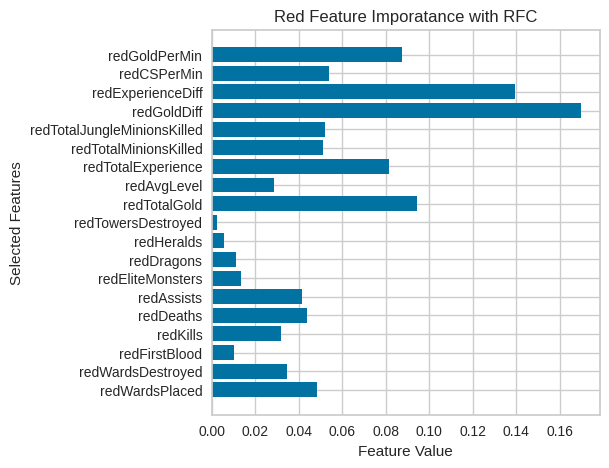

In [ ]:
plt.figure(figsize=(5, 5))
plt.barh(list(Xa_rfc), rfc_r.feature_importances_)
plt.title("Red Feature Imporatance with RFC")
plt.ylabel("Selected Features")
plt.xlabel("Feature Value")

In [ ]:
Xb_rfc = blueteam.drop(["blueWins"], 1)
yb_rfc = blueteam["blueWins"]

In [ ]:
rfc_b = RandomForestClassifier(random_state=0)
rfc_b.fit(Xb_rfc, yb_rfc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

Text(0.5, 0, 'Feature Value')

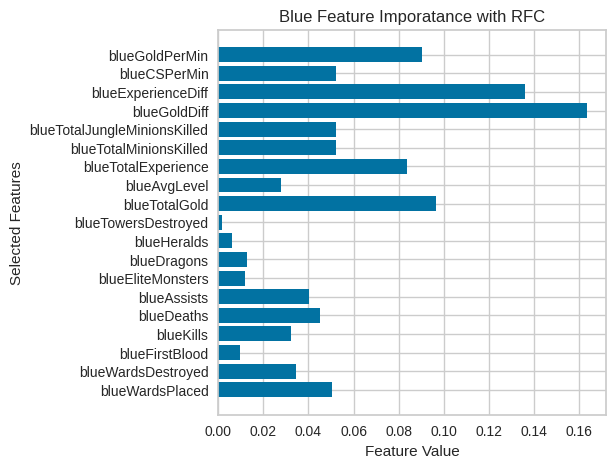

In [ ]:
plt.figure(figsize=(5, 5))
plt.barh(list(Xb_rfc), rfc_b.feature_importances_)
plt.title("Blue Feature Imporatance with RFC")
plt.ylabel("Selected Features")
plt.xlabel("Feature Value")

In [ ]:
blueteam

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5
9875,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8
9876,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3
9877,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9


In [ ]:
numerical_blues

['blueWardsPlaced',
 'blueTotalGold',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin']

In [ ]:
cols_blue

"Best features using backward elimination: ['blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff']"

In [ ]:
#df1 = list(set(numerical_blues) - set(cols_blue))
#df1

In [ ]:
s = pyclassification.setup(
    data=blueteam,
    ignore_features = list(set(numerical_blues)-set(cols_blue)),
    target="blueWins",
    session_id=269,
) #removing the overlap

,Description,Value
0,Session id,269
1,Target,blueWins
2,Target type,Binary
3,Original data shape,"(9879, 20)"
4,Transformed data shape,"(9879, 11)"
5,Transformed train set shape,"(6915, 11)"
6,Transformed test set shape,"(2964, 11)"
7,Ignore features,9
8,Numeric features,10
9,Preprocess,True


In [ ]:
best = pyclassification.compare_models()  # blue features to predict blue wins

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7129,0.7909,0.7152,0.7119,0.7132,0.4259,0.4263,0.0790
gbc,Gradient Boosting Classifier,0.7105,0.7876,0.7160,0.7080,0.7117,0.4210,0.4214,0.4930
ridge,Ridge Classifier,0.7103,0.0000,0.7108,0.7101,0.7101,0.4207,0.4211,0.0310
lda,Linear Discriminant Analysis,0.7102,0.7910,0.7108,0.7099,0.7100,0.4204,0.4208,0.0420
ada,Ada Boost Classifier,0.7085,0.7853,0.7111,0.7073,0.7089,0.4169,0.4173,0.2390
lightgbm,Light Gradient Boosting Machine,0.6967,0.7728,0.7004,0.6956,0.6976,0.3935,0.3939,0.3060
xgboost,Extreme Gradient Boosting,0.6862,0.7570,0.6914,0.6843,0.6875,0.3724,0.3728,0.1070
nb,Naive Bayes,0.6826,0.7639,0.5905,0.7229,0.6497,0.3649,0.3714,0.0330
rf,Random Forest Classifier,0.6762,0.7380,0.6792,0.6750,0.6769,0.3524,0.3526,0.7950
et,Extra Trees Classifier,0.6659,0.7135,0.6708,0.6646,0.6673,0.3319,0.3323,0.8470


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# numerical_blues

In [ ]:
# cols_blue

In [ ]:
# blueteam

In [ ]:
pyclassification.finalize_model(best)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['blueWardsDestroyed',
                                             'blueFirstBlood', 'blueKills',
                                             'blueDeaths', 'blueAssists',
                                             'blueEliteMonsters', 'blueDragons',
                                             'blueHeralds',
                                             'blueTowersDestroyed',
                                             'blueAvgLevel'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_emp...
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('actual_estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=269,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
pyclassification.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7119,0.7910,0.6998,0.7163,0.7079,0.4237,0.4238


,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueWins,prediction_label,prediction_score
87,4,0,5,8,7,1,1,0,0,6.6,1,0,0.7003
7623,3,0,5,4,2,2,1,1,0,6.6,1,1,0.5822
2330,3,1,7,4,7,1,1,0,0,7.4,1,1,0.8211
2301,3,0,7,4,14,0,0,0,0,6.8,1,1,0.5685
4171,1,1,1,6,1,0,0,0,0,6.8,1,0,0.8188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,4,0,10,12,6,1,1,0,0,6.8,0,0,0.6030
5207,2,1,3,2,6,1,1,0,0,6.8,0,1,0.6131
6615,4,0,11,7,13,1,1,0,0,7.2,1,1,0.8042
7249,1,1,8,1,6,1,0,1,2,7.2,1,1,0.9362


In [ ]:

pyclassification.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# logreg_model = create_model('lr')

In [ ]:
s = pyclassification.setup(data = redteam,
               ignore_features = list(set(numerical_reds)-set(cols_red)),
               target = 'blueWins',
               session_id=269) #now for red features

,Description,Value
0,Session id,269
1,Target,blueWins
2,Target type,Binary
3,Original data shape,"(9879, 20)"
4,Transformed data shape,"(9879, 11)"
5,Transformed train set shape,"(6915, 11)"
6,Transformed test set shape,"(2964, 11)"
7,Ignore features,9
8,Numeric features,10
9,Preprocess,True


In [ ]:
best = pyclassification.compare_models() #red features to predict blue wins

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7127,0.7893,0.7099,0.7138,0.7115,0.4253,0.4257,0.1430
ridge,Ridge Classifier,0.7111,0.0000,0.7097,0.7115,0.7103,0.4221,0.4225,0.0320
lda,Linear Discriminant Analysis,0.7111,0.7894,0.7094,0.7117,0.7102,0.4221,0.4225,0.0410
ada,Ada Boost Classifier,0.7108,0.7838,0.7039,0.7139,0.7085,0.4215,0.4220,0.3900
gbc,Gradient Boosting Classifier,0.7093,0.7833,0.7039,0.7114,0.7074,0.4186,0.4189,0.5840
lightgbm,Light Gradient Boosting Machine,0.6970,0.7692,0.6946,0.6977,0.6959,0.3941,0.3943,0.2180
xgboost,Extreme Gradient Boosting,0.6901,0.7594,0.6874,0.6911,0.6888,0.3802,0.3806,0.1080
nb,Naive Bayes,0.6843,0.7650,0.7777,0.6550,0.7110,0.3688,0.3756,0.0520
rf,Random Forest Classifier,0.6791,0.7434,0.6673,0.6833,0.6749,0.3582,0.3586,0.6620
et,Extra Trees Classifier,0.6694,0.7228,0.6589,0.6728,0.6655,0.3388,0.3391,0.8320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
pyclassification.finalize_model(best)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['redWardsDestroyed',
                                             'redFirstBlood', 'redKills',
                                             'redDeaths', 'redAssists',
                                             'redEliteMonsters', 'redDragons',
                                             'redHeralds', 'redTowersDestroyed',
                                             'redAvgLevel'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_feature...
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('actual_estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=269,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
pyclassification.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7122,0.7902,0.7079,0.7132,0.7106,0.4244,0.4244


,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,blueWins,prediction_label,prediction_score
87,2,1,8,5,6,0,0,0,0,7.2,1,0,0.6999
7623,3,1,4,5,5,0,0,0,0,6.8,1,1,0.6282
2330,2,0,4,7,4,0,0,0,0,6.8,1,1,0.7545
2301,3,1,4,7,5,0,0,0,0,6.6,1,1,0.7649
4171,2,0,6,1,6,1,1,0,0,7.0,1,0,0.8085
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,1,1,12,10,11,1,0,1,1,7.2,0,0,0.7678
5207,2,0,2,3,1,0,0,0,0,6.8,0,1,0.6599
6615,3,1,7,11,7,0,0,0,0,7.0,1,1,0.7379
7249,4,0,1,8,1,0,0,0,0,6.8,1,1,0.8927


In [ ]:
pyclassification.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…